# Lab assignment №1, part 3

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the third part of the assignment. First and second parts are waiting for you in the same directory.*__

##  Part 3. SVM and kernels

Kernels concept get adopted in variety of ML algorithms (e.g. Kernel PCA, Gaussian Processes, kNN, ...).

So in this task you are to examine kernels for SVM algorithm applied to rather simple artificial datasets.

To make it clear: we will work with the classification problem through the whole notebook. 

In [1]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import numpy as np

Let's generate our dataset and take a look on it.

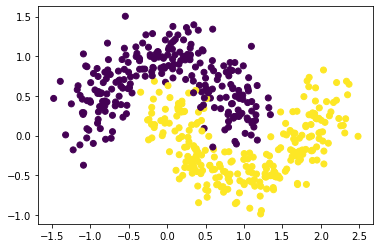

In [2]:
moons_points, moons_labels = make_moons(n_samples=500, noise=0.2, random_state=42)
plt.scatter(moons_points[:, 0], moons_points[:, 1], c=moons_labels)

## 1.1 Pure models.
First let's try to solve this case with good old Logistic Regression and simple (linear kernel) SVM classifier.

Train LR and SVM classifiers (choose params by hand, no CV or intensive grid search neeeded) and plot their decision regions. Calculate one preffered classification metric.

Describe results in one-two sentences.

_Tip:_ to plot classifiers decisions you colud use either sklearn examples ([this](https://scikit-learn.org/stable/auto_examples/neural_networks/plot_mlp_alpha.html#sphx-glr-auto-examples-neural-networks-plot-mlp-alpha-py) or any other) and mess with matplotlib yourself or great [mlxtend](https://github.com/rasbt/mlxtend) package (see their examples for details)

_Pro Tip:_ wirte function `plot_decisions` taking a dataset and an estimator and plotting the results cause you want to use it several times below

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

from mlxtend.plotting import plot_decision_regions

lr = LogisticRegression(C=1e3, tol=1e-3, solver="liblinear", max_iter=200) # add some params
svm = SVC(kernel='linear', C=1e2, tol=1e-3) # here too

### YOUR CODE HERE

In [4]:
def plot_decisions(clf, clf_name, X, y):
    fig = plt.figure(figsize=(10, 8))
    clf.fit(X, y)
    fig = plot_decision_regions(X=X, y=y, clf=clf, legend=1)

    y_pred = clf.predict(X)
    acc = accuracy_score(y, y_pred)
    title = clf_name + ": accuracy =" + str(acc)
    plt.title(title)
    
    plt.show()

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


<Figure size 720x576 with 0 Axes>

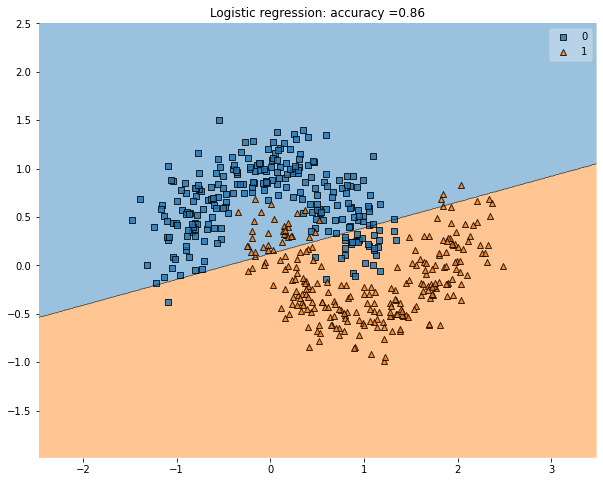

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


<Figure size 720x576 with 0 Axes>

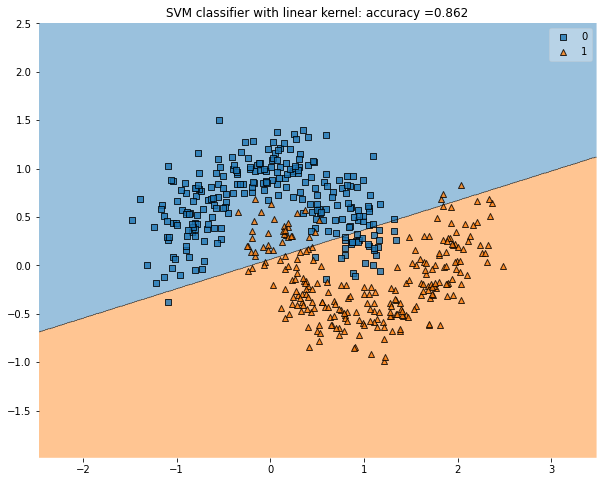

In [5]:
plot_decisions(lr, "Logistic regression", moons_points, moons_labels)
plot_decisions(svm, "SVM classifier with linear kernel", moons_points, moons_labels)

Использую метрику accuracy, т.к. классы сбалансированы. После подбора гиперпараметров удалось получить значение метрики 0.862, но так как сама выборка не является линейно разделимой, дальнейший подбор не позволит сильно улучшить результат - нужно перейти в пространство, где классы линейно разделимы

## 1.2 Kernel tirck

![keep-calm](https://github.com/girafe-ai/ml-mipt/blob/21f_basic/homeworks_basic/Lab1_ML_pipeline_and_SVM/imgs/keep-calm.jpg?raw=1)

Now use different kernels (`poly`, `rbf`, `sigmoid`) on SVC to get better results. Play `degree` parameter and others.

For each kernel estimate optimal params, plot decision regions, calculate metric you've chosen eariler.

Write couple of sentences on:

* What have happenned with classification quality?
* How did decision border changed for each kernel?
* What `degree` have you chosen and why?

In [6]:
from sklearn.model_selection import GridSearchCV

Подбор гиперпараметров для полиномиального ядра

In [40]:
param_grid_p = {"degree": [3, 4, 5, 6, 7, 8],
                "coef0": [0.5, 0.6, 0.7, 0.8, 0.9],
                "C": [1e2, 1e3, 1e4]}
svm_p = SVC(kernel='poly', tol=1e-3)
grid = GridSearchCV(svm_p, param_grid_p, cv=3)
grid.fit(moons_points, moons_labels)
print("Best CV_accuracy=", grid.best_score_)
print("Best parameters=", grid.best_params_)

Best CV_accuracy= 0.9799918235817522
Best parameters= {'C': 100.0, 'coef0': 0.7, 'degree': 4}


/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


<Figure size 720x576 with 0 Axes>

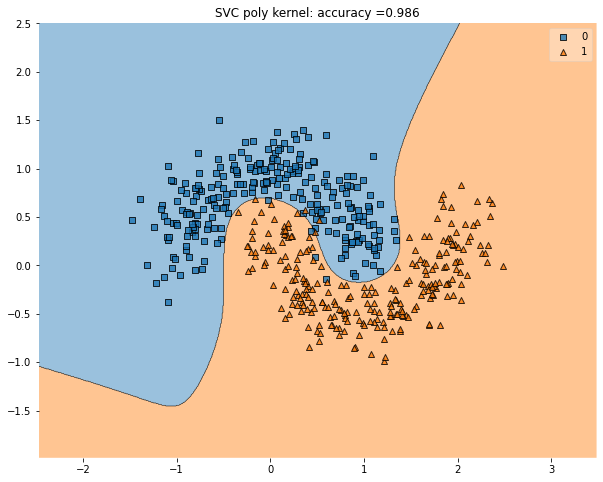

In [42]:
svm_p = SVC(kernel='poly', coef0=0.7, degree=4, C=1e2, tol=1e-3)
plot_decisions(svm_p, "SVC poly kernel", moons_points, moons_labels)

Проверю, как при такой комбинации параметров меняется вид разделяющей поверхности в зависимости от степени полинома

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


<Figure size 720x576 with 0 Axes>

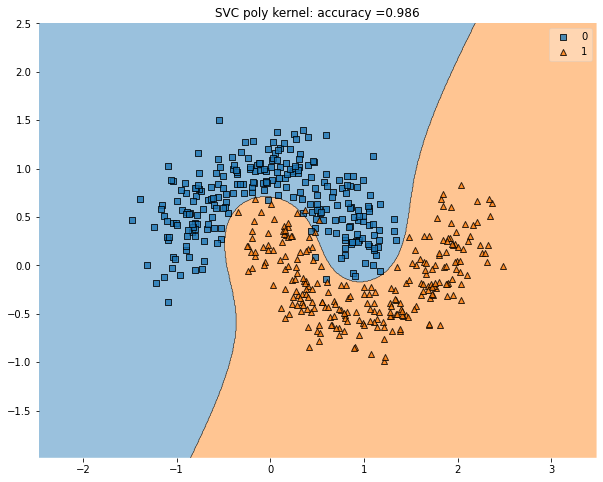

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


<Figure size 720x576 with 0 Axes>

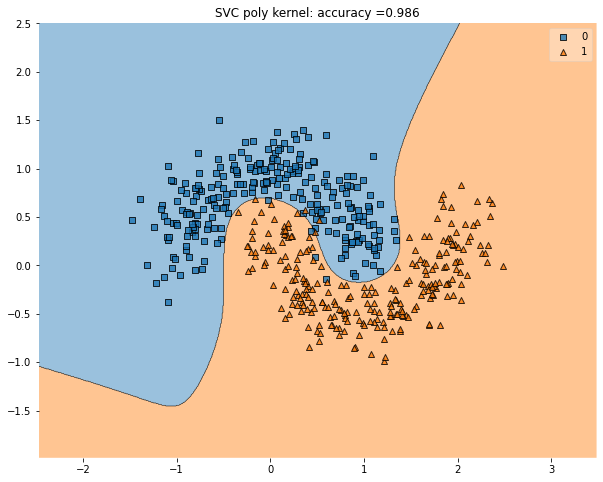

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


<Figure size 720x576 with 0 Axes>

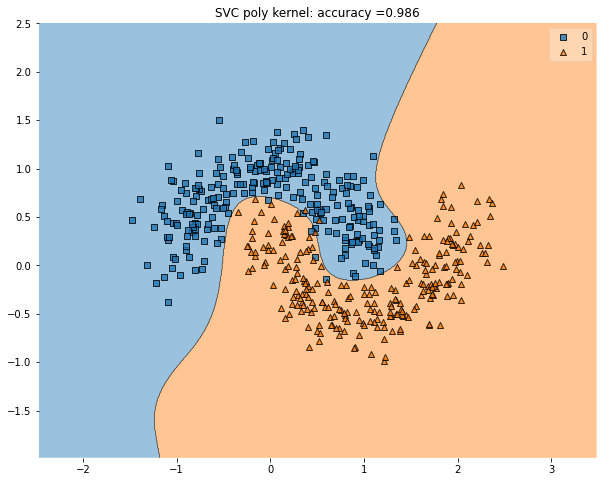

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


<Figure size 720x576 with 0 Axes>

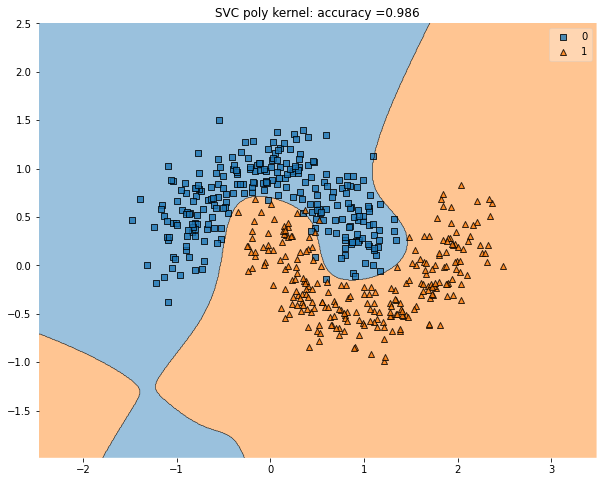

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


<Figure size 720x576 with 0 Axes>

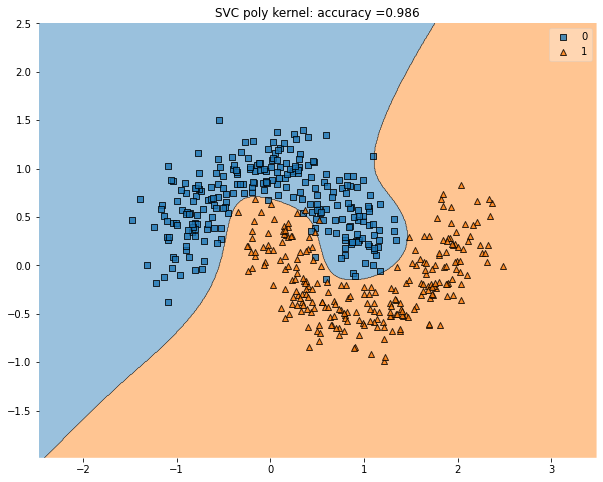

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


<Figure size 720x576 with 0 Axes>

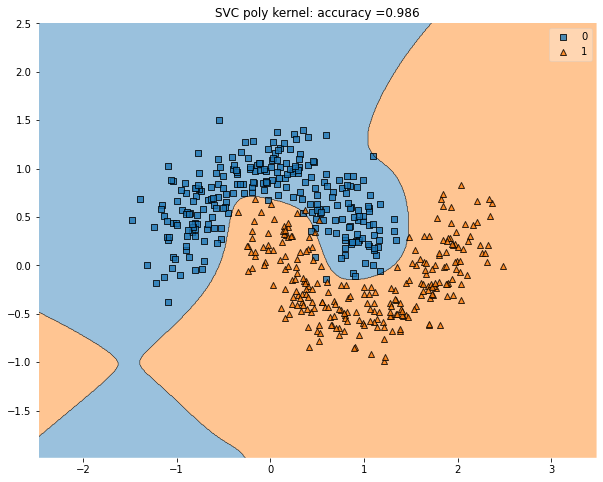

In [41]:
for item in param_grid_p["degree"]: #степень меняется от 3 до 8 с шагом 1
    svm_p = SVC(kernel='poly', coef0=0.7, degree=item, C=1e2, tol=1e-3)
    plot_decisions(svm_p, "SVC poly kernel", moons_points, moons_labels)

Подбор гиперпараметров для rbf kernel

In [64]:
param_grid_r = {"C": [1, 10, 1e2, 1e3, 1e4], "tol": [1e-4, 1e-3, 1e-2]}
svm_r = SVC(kernel='rbf')
grid = GridSearchCV(svm_r, param_grid_r, cv=2)
grid.fit(moons_points, moons_labels)
print("Best CV_accuracy=", grid.best_score_)
print("Best parameters=", grid.best_params_)

Best CV_accuracy= 0.98
Best parameters= {'C': 100.0, 'tol': 0.0001}


/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


<Figure size 720x576 with 0 Axes>

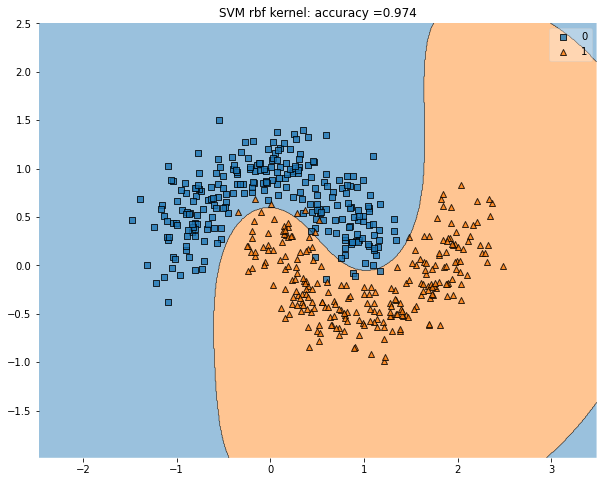

In [71]:
swm_r = SVC(kernel='rbf', C=1e2, tol=1e-4)
plot_decisions(svm_r, "SVM rbf kernel", moons_points, moons_labels)

Подбор гиперпараметров для sigmoid kernel

In [84]:
param_grid_s = {"coef0": [0.1, 0.2, 0.6, 0.8, 5.0],
                "C": [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 1e2, 1e3]}
svm_s = SVC(kernel='sigmoid', tol = 1e-4)
grid = GridSearchCV(svm_s, param_grid_s, cv=2)
grid.fit(moons_points, moons_labels)
print("Best CV_accuracy=", grid.best_score_)
print("Best parameters=", grid.best_params_)

Best CV_accuracy= 0.79
Best parameters= {'C': 1e-05, 'coef0': 0.6}


/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


<Figure size 720x576 with 0 Axes>

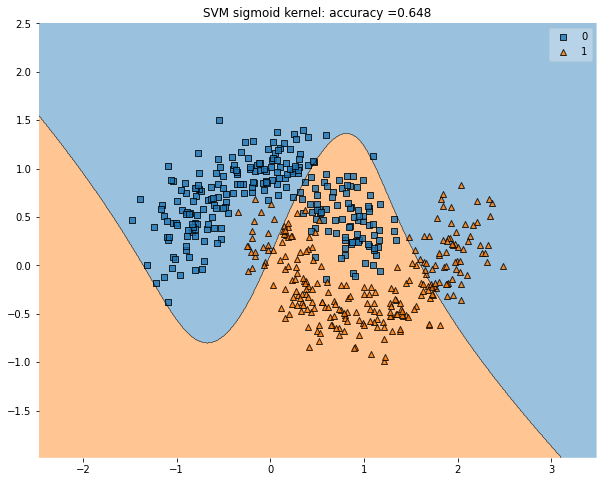

In [86]:
swm_s = SVC(kernel='sigmoid', C=1e-5, coef0=0.6, tol=1e-4, gamma="auto")
plot_decisions(svm_s, "SVM sigmoid kernel", moons_points, moons_labels)

Качество классификации и по метрике, и по визуализации разделения на классы сильно возросло для ядер polynomial и rbf, тк за счет нелинейности разделяющих поверхностей они способны лучше описать распределение объектов каждого класса, чем в линейном случае. Проварьировала степень полинома для poly kernel, c ее ростом граница раздела приобретает более сложную форму -> модель лучше выучивает сложное распределение данных. Но на этом датасете значения метрики фактически не отличаются для degree от 3 до 8, поэтому я оставила degree=5 в составе лучшего набора гиперпараметров, выбранных Grid Search.

## 1.3 Simpler solution (of a kind)
What is we could use Logisitc Regression to successfully solve this task?

Feature generation is a thing to help here. Different techniques of feature generation are used in real life, couple of them will be covered in additional lectures.

In particular case simple `PolynomialFeatures` ([link](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)) are able to save the day.

Generate the set of new features, train LR on it, plot decision regions, calculate metric.

* Comare SVM's results with this solution (quality, borders type)
* What degree of PolynomialFeatures have you used? Compare with same SVM kernel parameter.

In [5]:
from sklearn.preprocessing import PolynomialFeatures
### YOUR CODE HERE
degree = 8

poly = PolynomialFeatures(degree)
points_transformed = poly.fit_transform(moons_points)

lr = LogisticRegression(C=1e4, tol=1e-3, solver="liblinear", max_iter=200)
lr.fit(points_transformed, moons_labels)
precision = lr.predict(points_transformed)
print("Accuracy for logistic regression with polynomial features", accuracy_score(moons_labels, precision))

Accuracy for logistic regression with polynomial features 0.984


Использую отдельную функцию для визуализации в случае полиномиальных признаков

In [6]:
def plot_decisions_poly(clf, points, labels):
    x = np.arange(-2, 3, 0.01)
    y = np.arange(-2, 2, 0.01)
    xx, yy = np.meshgrid(x, y)

    X1 = np.c_[xx.ravel(), yy.ravel()]
    X_pol = poly.fit_transform(X1)
    
    X_pred = clf.predict(X_pol).reshape(xx.shape)

    plt.figure(figsize=(10, 8))
    plt.pcolormesh(xx, yy, X_pred, cmap='spring')
    plt.scatter(points[:,0], points[:,1], c=labels, edgecolors='k', cmap='spring')

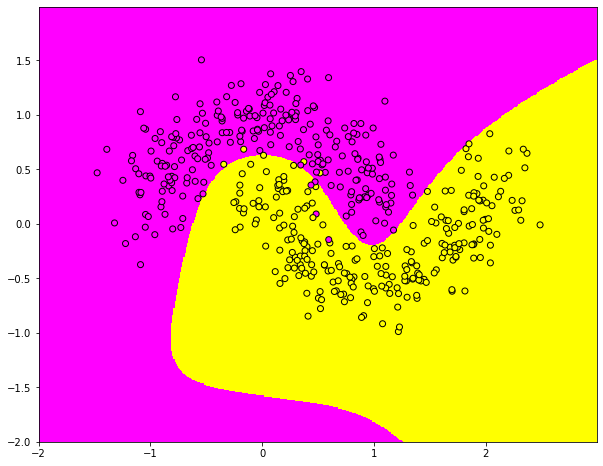

In [30]:
plot_decisions_poly(lr, moons_points, moons_labels)

Качество классификации LR для датасета с сгенерированными признаками(accuracy=0.984) практически совпадает с SVM с полиномиальным ядром(accuracy=0.986) и оно лучше, чем у SVM c остальными типами ядер. Лучшее значение метрики получилось при генерации полиномов 8 степени и при этом вид разделяющей поверхности похож на SVM c полиноминальным ядром той же степени(последняя картинка в ячейке с варьированием degree от 3 до 8). Так и должно было получиться, потому что оба подхода используют переход к пространству полиномиальных комбинаций признаков.

## 1.4 Harder problem

Let's make this task a bit more challenging via upgrading dataset:

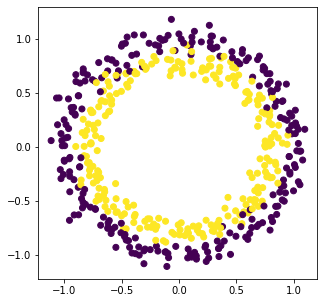

In [7]:
from sklearn.datasets import make_circles

circles_points, circles_labels = make_circles(n_samples=500, noise=0.06, random_state=42)

plt.figure(figsize=(5, 5))
plt.scatter(circles_points[:, 0], circles_points[:, 1], c=circles_labels)

And even more:

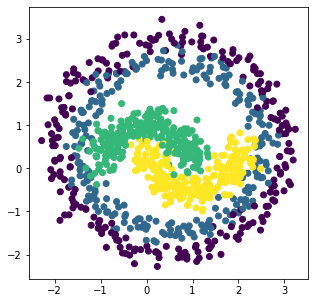

In [8]:
points = np.vstack((circles_points*2.5 + 0.5, moons_points))
labels = np.hstack((circles_labels, moons_labels + 2)) # + 2 to distinct moons classes

plt.figure(figsize=(5, 5))
plt.scatter(points[:, 0], points[:, 1], c=labels)

Now do your best using all the approaches above!

Tune LR with generated features, SVM with appropriate kernel of your choice. You may add some of your loved models to demonstrate their (and your) strength. Again plot decision regions, calculate metric.

Justify the results in a few phrases.

Circles

Вручную подобрала гиперпараметры для LR с полиномиальными признаками и SVM с разными типами ядер, при которых достигаются максимальные значения метрики. Эти модели достигли высокой точности классификации (95-99%), но при этом выделили области, где вообще нет объектов из тренировочной выборки.

In [49]:
### YOUR CODE HERE
degree = 30

poly = PolynomialFeatures(degree)
points_transformed = poly.fit_transform(circles_points)

lr = LogisticRegression(C=1e4, tol=1e-3, solver="liblinear", max_iter=500)
lr.fit(points_transformed, circles_labels)
precision = lr.predict(points_transformed)
print("Accuracy for logistic regression with polynomial features", accuracy_score(circles_labels, precision))

Accuracy for logistic regression with polynomial features 0.952


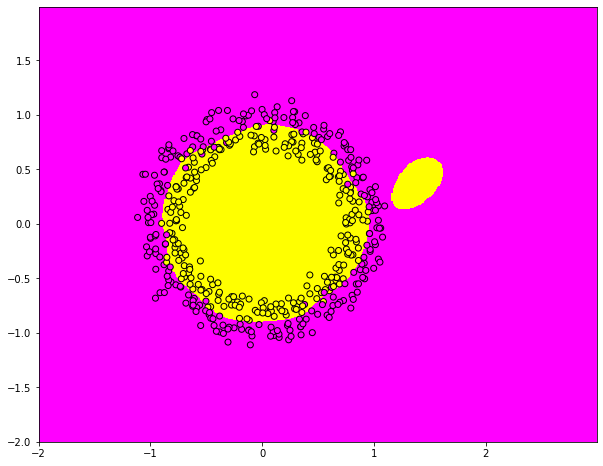

In [50]:
plot_decisions_poly(lr, circles_points, circles_labels)

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


<Figure size 720x576 with 0 Axes>

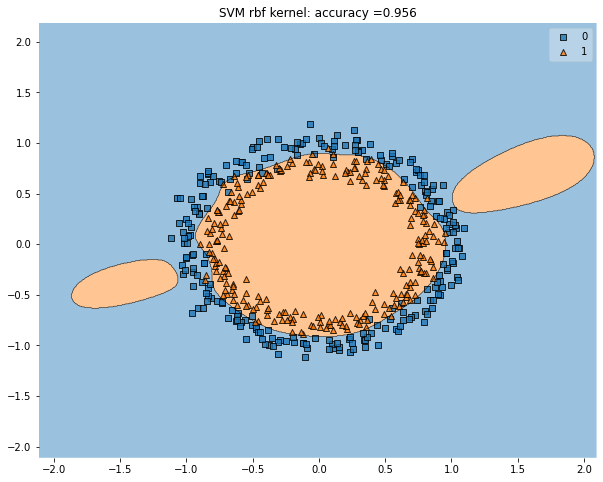

In [59]:
clf = SVC(kernel='rbf', C=1e6, tol=1e-4)
plot_decisions(clf, "SVM rbf kernel", circles_points, circles_labels)

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


<Figure size 720x576 with 0 Axes>

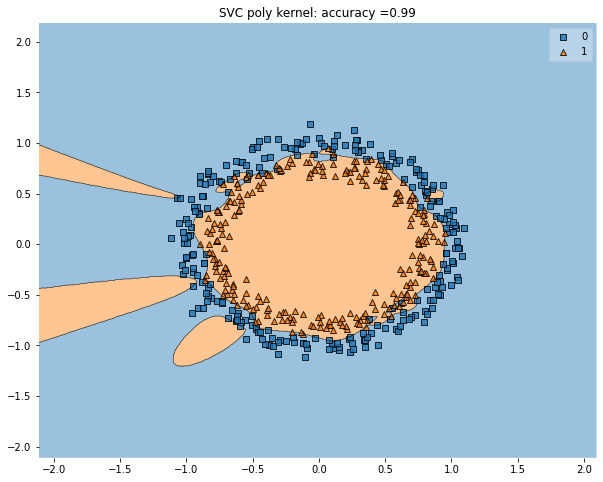

In [64]:
svm_p = SVC(kernel='poly', coef0=0.5, degree=25, C=1e4, tol=1e-4)
plot_decisions(svm_p, "SVC poly kernel", circles_points, circles_labels)

Применяю градиентный бустинг, чтобы добиться лучшего качества классификации

In [14]:
!pip install catboost

     |████████████████████████████████| 76.3 MB 24 kB/s 


С помощью gridsearch подбираю оптимальные гиперпараметры

In [23]:
clf = CatBoostClassifier(iterations = 500, eval_metric="Accuracy")
grid = {'depth': np.linspace(10, 60, 10)}
grid_search_res = clf.grid_search(grid, circles_points, circles_labels)
print("grid_search best parameters=", grid_search_res)

0:	learn: 0.8525000	test: 0.8300000	best: 0.8300000 (0)	total: 8.2ms	remaining: 4.09s
1:	learn: 0.8550000	test: 0.8700000	best: 0.8700000 (1)	total: 15.9ms	remaining: 3.95s
2:	learn: 0.8825000	test: 0.8600000	best: 0.8700000 (1)	total: 24.8ms	remaining: 4.11s
3:	learn: 0.8925000	test: 0.8900000	best: 0.8900000 (3)	total: 32.6ms	remaining: 4.05s
4:	learn: 0.9000000	test: 0.9000000	best: 0.9000000 (4)	total: 40.1ms	remaining: 3.97s
5:	learn: 0.8850000	test: 0.8800000	best: 0.9000000 (4)	total: 44ms	remaining: 3.62s
6:	learn: 0.8800000	test: 0.9000000	best: 0.9000000 (4)	total: 51.7ms	remaining: 3.64s
7:	learn: 0.8875000	test: 0.8900000	best: 0.9000000 (4)	total: 59.3ms	remaining: 3.65s
8:	learn: 0.9000000	test: 0.9100000	best: 0.9100000 (8)	total: 66.7ms	remaining: 3.64s
9:	learn: 0.9075000	test: 0.9200000	best: 0.9200000 (9)	total: 74.7ms	remaining: 3.66s
10:	learn: 0.9100000	test: 0.9200000	best: 0.9200000 (9)	total: 81.8ms	remaining: 3.64s
11:	learn: 0.9050000	test: 0.9200000	best: 0.

0:	learn: 0.6714643	total: 30.5ms	remaining: 30.5s
1:	learn: 0.6458428	total: 59.9ms	remaining: 29.9s
2:	learn: 0.6164434	total: 87.2ms	remaining: 29s
3:	learn: 0.5911638	total: 123ms	remaining: 30.7s
4:	learn: 0.5718361	total: 153ms	remaining: 30.4s
5:	learn: 0.5539557	total: 180ms	remaining: 29.8s
6:	learn: 0.5302821	total: 208ms	remaining: 29.5s
7:	learn: 0.5137310	total: 241ms	remaining: 29.9s
8:	learn: 0.4963138	total: 269ms	remaining: 29.6s
9:	learn: 0.4783829	total: 295ms	remaining: 29.2s
10:	learn: 0.4703702	total: 296ms	remaining: 26.6s
11:	learn: 0.4575667	total: 322ms	remaining: 26.5s
12:	learn: 0.4421723	total: 348ms	remaining: 26.4s
13:	learn: 0.4298558	total: 378ms	remaining: 26.6s
14:	learn: 0.4186990	total: 404ms	remaining: 26.5s
15:	learn: 0.4084497	total: 430ms	remaining: 26.4s
16:	learn: 0.3955157	total: 463ms	remaining: 26.8s
17:	learn: 0.3840987	total: 489ms	remaining: 26.7s
18:	learn: 0.3757935	total: 515ms	remaining: 26.6s
19:	learn: 0.3642476	total: 542ms	remain

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


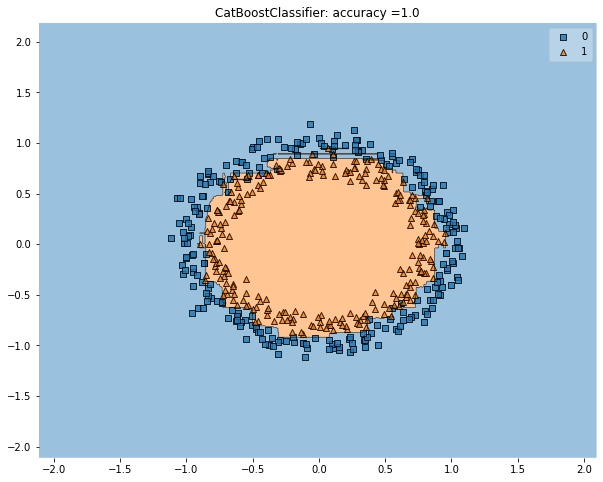

In [30]:
clf = CatBoostClassifier(max_depth=12, l2_leaf_reg=0.7)
plot_decisions(clf, "CatBoostClassifier", circles_points, circles_labels)

По визуализации и по значению метрики(100% точность классификации) CatBoostClassifier практически идеально справился

4-class moons+circles

Лучшее значение accuracy из предложенных моделей получилось при использовании SVM с полиномиальным ядром 8 степени(0.952), CatBoostClassifier достиг accuracy=1.0


/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


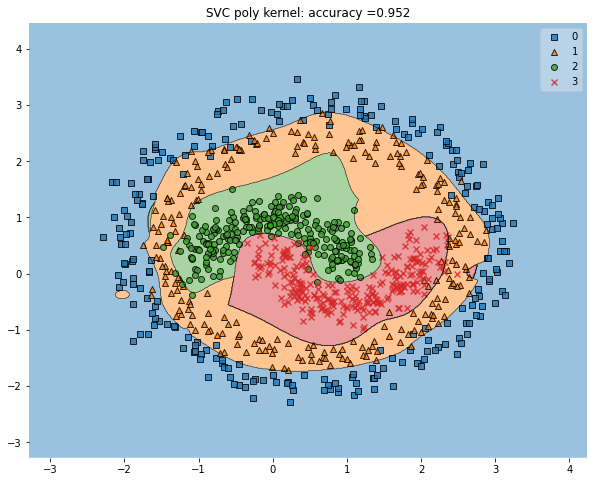

In [10]:
svm_p = SVC(kernel='poly', coef0=0.5, degree=8, C=1e4, tol=1e-4)
plot_decisions(svm_p, "SVC poly kernel", points, labels)

Learning rate set to 0.079127
0:	learn: 1.2951027	total: 26.9ms	remaining: 26.9s
1:	learn: 1.2130201	total: 53.3ms	remaining: 26.6s
2:	learn: 1.1295546	total: 80.5ms	remaining: 26.7s
3:	learn: 1.0671393	total: 105ms	remaining: 26.2s
4:	learn: 1.0104307	total: 130ms	remaining: 25.9s
5:	learn: 0.9599096	total: 154ms	remaining: 25.5s
6:	learn: 0.9159426	total: 179ms	remaining: 25.3s
7:	learn: 0.8719299	total: 216ms	remaining: 26.7s
8:	learn: 0.8342857	total: 250ms	remaining: 27.5s
9:	learn: 0.7941447	total: 276ms	remaining: 27.3s
10:	learn: 0.7644695	total: 302ms	remaining: 27.1s
11:	learn: 0.7325498	total: 326ms	remaining: 26.9s
12:	learn: 0.7002790	total: 350ms	remaining: 26.6s
13:	learn: 0.6738918	total: 375ms	remaining: 26.4s
14:	learn: 0.6519276	total: 399ms	remaining: 26.2s
15:	learn: 0.6280078	total: 429ms	remaining: 26.4s
16:	learn: 0.6045865	total: 456ms	remaining: 26.4s
17:	learn: 0.5831911	total: 487ms	remaining: 26.6s
18:	learn: 0.5635551	total: 513ms	remaining: 26.5s
19:	lear

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


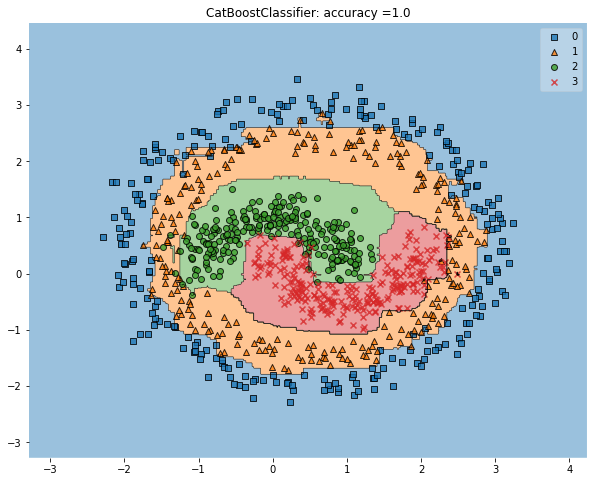

In [27]:
clf = CatBoostClassifier(max_depth=10)
plot_decisions(clf, "CatBoostClassifier", points, labels)

__*Итог: подбором гиперпараметров можно добиться высокой точности классификации Kernel SVM и лог регрессией с полиномиальными признаками даже на сложных распределениях данных, но более продвинутые модели, например, градиентный бустинг на деревьях решений, показывают лучший результат.*__